In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from unyt import Myr

from synthesizer.grid import Grid
from synthesizer.parametric import SFH, ZDist
from synthesizer.parametric import Stars as ParametricStars
from synthesizer.particle.stars import sample_sfhz
from synthesizer.particle.gas import Gas
from synthesizer.particle.galaxy import Galaxy
from synthesizer.particle.particles import CoordinateGenerator
from synthesizer.kernel_functions import Kernel

In [2]:
# test file is loading in
f = h5py.File('../../synthesizer/data/grids/bc03_chabrier03-0.1,100.hdf5')
f.keys


<bound method MappingHDF5.keys of <HDF5 file "bc03_chabrier03-0.1,100.hdf5" (mode r)>>

In [20]:
'''
# Define the grid
grid_name = "bc03_chabrier03-0.1,100.hdf5"
grid_dir = "../../synthesizer/data/grids/"
grid = Grid(grid_name, grid_dir=grid_dir, read_lines=False)
'''
# Define the grid
grid_name = "bpass-2.2.1-bin_chabrier03-0.1,300.0.hdf5"
grid_dir = "../../synthesizer/data/grids/"
grid = Grid(grid_name, grid_dir=grid_dir, read_lines=False)


In [21]:
grid

In [22]:
print(grid)


------------------------------
SUMMARY OF GRID
log10age: [ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1
 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. ] 
metallicity: [1.0e-05 1.0e-04 1.0e-03 2.0e-03 3.0e-03 4.0e-03 6.0e-03 8.0e-03 1.0e-02
 1.4e-02 2.0e-02 3.0e-02 4.0e-02] 
alpha:  
axes: ['log10age' 'metallicity'] 
imf_masses: [1.e-01 3.e+02] 
imf_slopes:  
imf_type: chabrier03 
original_model_name: bpass_v2.2.1_imf_chab300 
sps_name: bpass 
sps_variant: bin 
sps_version: 2.2.1 
available spectra: ['stellar']
------------------------------



In [7]:
#Plot a single grid point

#We can plot the spectra at the location of a single point in our grid. First, we choose some age and metallicity

log10age = 6.0  # log10(age/yr)
Z = 0.01  # metallicity

In [8]:
# We then get the index location of that grid point for this age and metallicity

grid_point = grid.get_grid_point((log10age, Z))


Text(0, 0.5, '$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$')

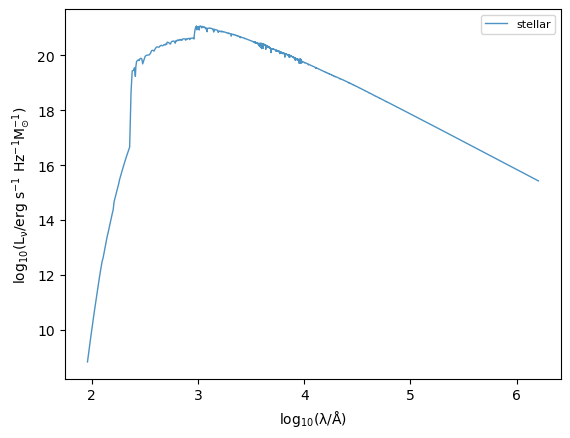

In [9]:
#We can then loop over the available spectra (contained in grid.spec_names) and plot

for spectra_id in grid.available_spectra:
    # get Sed object
    sed = grid.get_spectra(grid_point, spectra_id=spectra_id)
    plt.plot(
        np.log10(sed.lam), np.log10(sed.lnu), lw=1, alpha=0.8, label=spectra_id
    )

plt.legend(fontsize=8, labelspacing=0.0)
plt.xlabel(r"$\rm log_{10}(\lambda/\AA)$")
plt.ylabel(r"$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1} M_{\odot}^{-1})$")

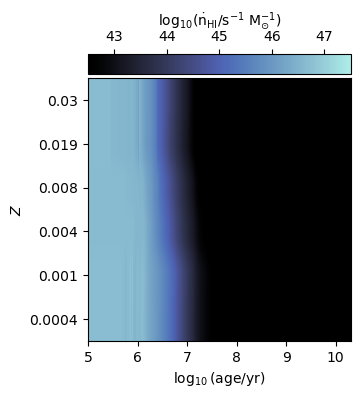

In [10]:
# Plot ionising luminosities
# We can also plot properties over the entire age and metallicity grid, such as the ionising luminosity.
# In the examples below we plot ionising luminosities for HI and HeII

fig, ax = grid.plot_specific_ionising_lum(ion="HI")


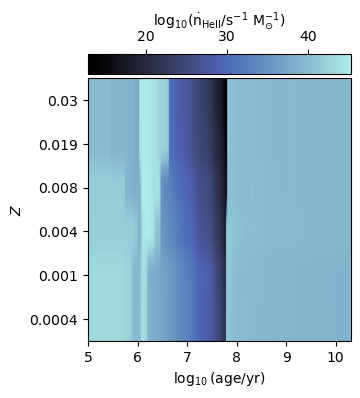

In [11]:
fig, ax = grid.plot_specific_ionising_lum(ion="HeII")
